## Интеллектуальный анализ данных – весна 2021
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [3]:
X.isna().sum().sum() # сколько пропусков

0

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

Категориальных переменных нет, пропусков нет.

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns = data['feature_names'])

In [6]:
from sklearn.model_selection import train_test_split
np.random.seed(17)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [7]:
print("{: <3} {: >9} {: >7}".format(*['NN', 'Train', 'Test']))
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
neigh = []
n = [1, 3, 5, 10, 15, 25]
for i in range(6):
    neigh.append(KNeighborsClassifier(n_neighbors=n[i]))
    neigh[i].fit(X_train[['alcohol', 'magnesium']], y_train)
    acc_train = accuracy_score(y_train, neigh[i].predict(X_train[['alcohol', 'magnesium']]))
    acc_test = accuracy_score(y_test, neigh[i].predict(X_test[['alcohol', 'magnesium']]))
    print("{: <3} {:8.2f} {:8.2f}".format(*[n[i], acc_train, acc_test,]))

NN      Train    Test
1       0.99     0.69
3       0.78     0.63
5       0.79     0.72
10      0.76     0.63
15      0.77     0.69
25      0.75     0.63


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [8]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

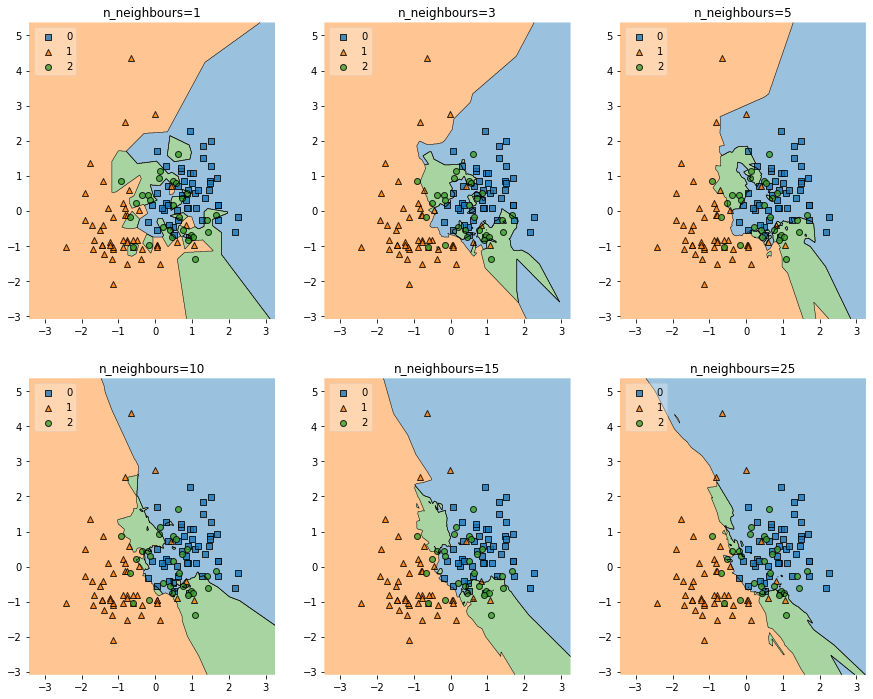

In [9]:
import matplotlib.gridspec as gridspec
import itertools
from mlxtend.plotting import plot_decision_regions
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(15,12))

labels = ['n_neighbours=1', 'n_neighbours=3', 'n_neighbours=5', 'n_neighbours=10', 'n_neighbours=15', 'n_neighbours=25']
for clf, lab, grd in zip(neigh, labels, itertools.product([0, 1], [0, 1, 2])):
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train[['alcohol', 'magnesium']].values, y=y_train, clf=clf, legend=2)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

В задаче 1.3 лучший результат на тесте для пяти соседей. На трейне, очевидно, лучший результат для одного соседа, так как самая близкая к себе точка -- она сама (происходит переобучение), а второй результат -- тоже для пяти соседей. То есть, 5 соседей из задачи 1.3 лучший вариант.

В задаче 1.5 видно, что для одного соседа сильное переобучение. Это показывает, например, маленькая зеленая область посреди большой синей. Для трех соседей тоже переобучается. Области слишком неровные, с маленькими выпирающими участками. Для пяти соседей тоже немного переобучается в центре и нижней части картинки, но для 10-25 соседей недообучается в верхней части, относя красных к синим. Так что для пяти соседей результат все-таки лучше, но есть переобучение.

### Задание 2: Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

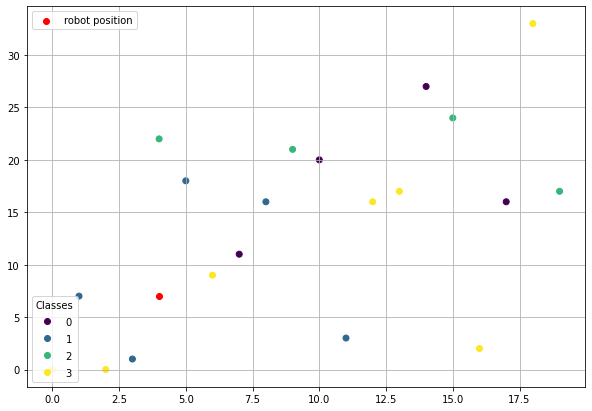

In [10]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1 (1.5 балла)** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [11]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Attributes:
        ------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        # Store the history of movements
        self.trajectory = np.array([initial_position])
        
        # kNN Classifier for determining the classes of landmarks
        self.knn = KNeighborsClassifier(n_neighbors=k).fit(landmarks, classes)
        
        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
    def move(self):
        if np.random.binomial(1, .2, 1) == 1: #двигается вправо
            new_position = self.trajectory[-1] + np.array([1, 0])
        else:
            new_position = self.trajectory[-1] + self.mapping[self.knn.predict([self.trajectory[-1]])[0]]
        self.trajectory = np.append(self.trajectory, [new_position], axis = 0)

**Задача 2.2 (0.5 балла)** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [12]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    traj = robot.trajectory
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()

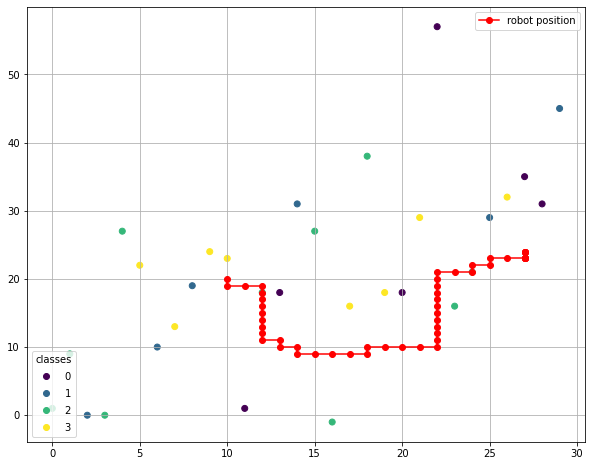

In [13]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

**Задача 2.3 (1 балл)** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

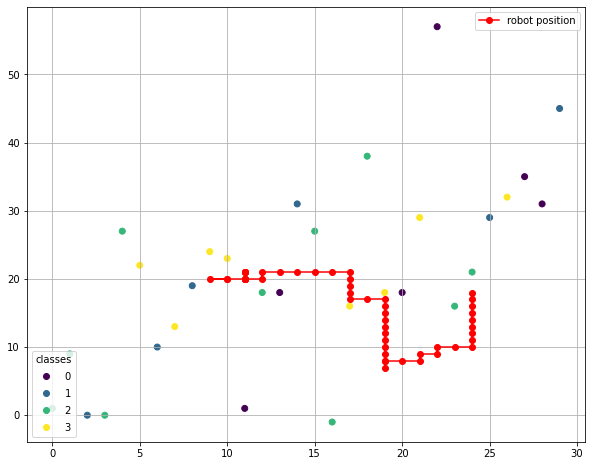

In [14]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 1, n_movements = 50)

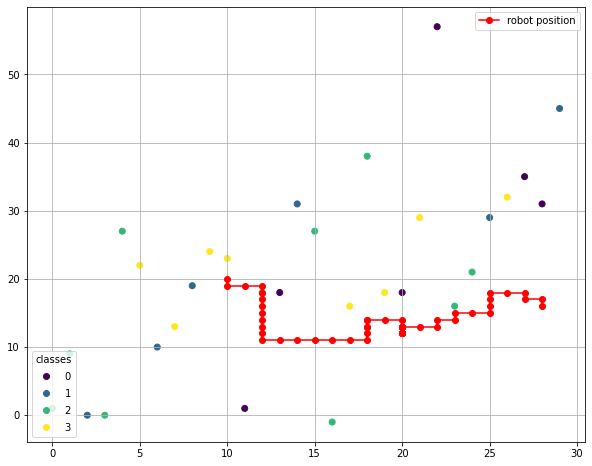

In [15]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 10, n_movements = 50)

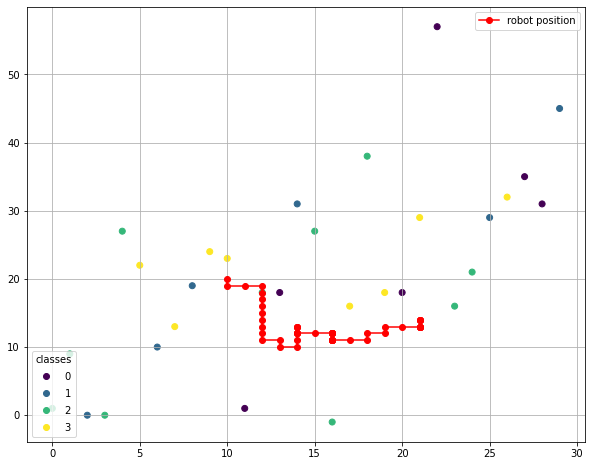

In [16]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 15, n_movements = 50)

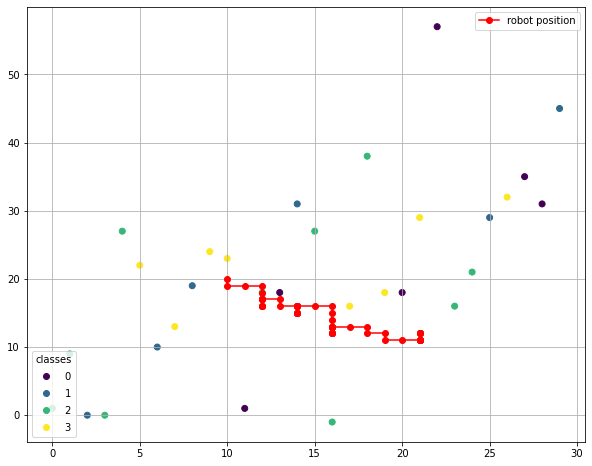

In [17]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 20, n_movements = 50)

Как число соседей влияет на траекторию движения робота в нашем эксперименте?
Для k=1 робот идёт по прямой пока не поменяется ближайший сосед, либо пока не выпадет орёл. Так что путь робота местами меняет направление. Можно увидеть явно, когда он идет вниз, когда вверх. Путь из больших кусков примерно одного направления.

Для большего k путь становится более "рваным", в нем прямые участки короче. Для маленьких k прослеживается путь вправо-вниз-вправо-вверх. Для более больщих k общее направление вправо и немного вниз по диагонали. Однако, для совсем больших k около 30, очевидно, будет направление туда, какого класса всего больше и иногда вправо.

Если классы назначаются меткам не случайно, а осмысленно, то участки прямого пути (не учитывая случайные шаги вправо) будут длиннее, так как в одних областях будет больше одного цвета. Тогда, наоборот, для маленьких k путь будет колебаться сильнее, а для больших k будут более длинные почти прямые участки, так как будут скопления точек какого-то одного цвета.

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [18]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

In [19]:
y = data['price']

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [20]:
data.isna().sum().sum() 

0

Нет пропущенных.

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [21]:
data = data.drop(columns=['Unnamed: 0'])

**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [22]:
data.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


С целевой переменной больше всего коррелирует признак carat, чуть слабее x, затем y и z. А table и depth коррелируют слабо. 

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [23]:
data = pd.get_dummies(data, drop_first=True)

**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [24]:
X = data.drop(columns=['price'])

In [25]:
np.random.seed(17)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [26]:
scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns = X.columns)

In [27]:
np.random.seed(17)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [28]:
X

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.198168,-0.174092,-1.099672,-1.587837,-1.536196,-1.571129,-0.316312,1.225928,-0.586085,-0.537255,...,-0.426570,-0.334294,-0.234343,-0.185268,-0.565361,2.206098,-0.422524,-0.542295,-0.269603,-0.321954
1,-1.240361,-1.360738,1.585529,-1.641325,-1.658774,-1.741175,-0.316312,-0.815708,1.706238,-0.537255,...,-0.426570,-0.334294,-0.234343,-0.185268,1.768781,-0.453289,-0.422524,-0.542295,-0.269603,-0.321954
2,-1.198168,-3.385019,3.375663,-1.498691,-1.457395,-1.741175,3.161440,-0.815708,-0.586085,-0.537255,...,-0.426570,-0.334294,-0.234343,-0.185268,-0.565361,-0.453289,2.366727,-0.542295,-0.269603,-0.321954
3,-1.071587,0.454133,0.242928,-1.364971,-1.317305,-1.287720,-0.316312,-0.815708,1.706238,-0.537255,...,-0.426570,2.991381,-0.234343,-0.185268,-0.565361,-0.453289,-0.422524,1.844015,-0.269603,-0.321954
4,-1.029394,1.082358,0.242928,-1.240167,-1.212238,-1.117674,3.161440,-0.815708,-0.586085,-0.537255,...,-0.426570,-0.334294,4.267248,-0.185268,-0.565361,2.206098,-0.422524,-0.542295,-0.269603,-0.321954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,-0.164427,-0.662711,-0.204605,0.016798,0.022304,-0.054888,-0.316312,1.225928,-0.586085,-0.537255,...,-0.426570,-0.334294,-0.234343,-0.185268,1.768781,-0.453289,-0.422524,-0.542295,-0.269603,-0.321954
53936,-0.164427,0.942753,-1.099672,-0.036690,0.013548,0.100988,3.161440,-0.815708,-0.586085,-0.537255,...,-0.426570,-0.334294,-0.234343,-0.185268,1.768781,-0.453289,-0.422524,-0.542295,-0.269603,-0.321954
53937,-0.206621,0.733344,1.137995,-0.063434,-0.047741,0.030135,-0.316312,-0.815708,-0.586085,1.861315,...,-0.426570,-0.334294,-0.234343,-0.185268,1.768781,-0.453289,-0.422524,-0.542295,-0.269603,-0.321954
53938,0.130927,-0.523105,0.242928,0.373383,0.337506,0.285204,-0.316312,-0.815708,1.706238,-0.537255,...,2.344283,-0.334294,-0.234343,-0.185268,-0.565361,2.206098,-0.422524,-0.542295,-0.269603,-0.321954


**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [30]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)
print(mean_squared_error(y_pred_train, y_train))
print(mean_squared_error(y_pred_test, y_test))

1274045.0062812346
1283045.877103768


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [31]:
print("{: <15} {:20.2f}".format('сдвиг', reg.intercept_))
for column, coef in zip(X.columns, reg.coef_):
    print("{: <15} {:20.2f}".format(column, coef))

сдвиг                        3933.93
carat                        5367.46
depth                         -94.93
table                         -61.92
x                           -1147.38
y                              -2.17
z                             -32.34
cut_Good                      165.80
cut_Ideal                     405.15
cut_Premium                   328.00
cut_Very Good                 304.10
color_E                       -82.56
color_F                      -107.10
color_G                      -197.83
color_H                      -357.76
color_I                      -446.60
color_J                      -525.90
clarity_IF                    949.82
clarity_SI1                  1546.31
clarity_SI2                   990.13
clarity_VS1                  1620.42
clarity_VS2                  1765.37
clarity_VVS1                 1245.43
clarity_VVS2                 1430.48


коэффициенты carat, x, clarity_SI1, clarity_VS1, clarity_VS2, clarity_VVS1 и clarity_VVS2 по модулю на порядок превышают оценки прочих вещественных переменных.

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [32]:
# L1
from sklearn.linear_model import Lasso
reg = Lasso(alpha=10, max_iter=2000).fit(X_train, y_train)
print("{: <14} {:8.2f}".format('сдвиг', reg.intercept_))
for column, coef in zip(X.columns, reg.coef_):
    print("{: <14} {:8.2f}".format(column, coef))

сдвиг           3933.83
carat           4852.02
depth            -98.39
table            -72.66
x               -673.16
y                 -0.00
z                -38.03
cut_Good          43.64
cut_Ideal        204.64
cut_Premium      147.14
cut_Very Good    139.02
color_E          -11.45
color_F          -39.89
color_G         -119.24
color_H         -284.41
color_I         -374.28
color_J         -464.51
clarity_IF       638.89
clarity_SI1      820.33
clarity_SI2      360.14
clarity_VS1     1005.56
clarity_VS2     1055.74
clarity_VVS1     815.84
clarity_VVS2     933.14


Веса уменьшились, 'y' занулился. 'carat' и 'x' по модулю уменьшились примерно на 500. Разные 'clarity' уменьшились примерно на 400-700.

In [33]:
# L2
from sklearn.linear_model import Ridge

reg = Ridge(alpha=10).fit(X_train, y_train)
print("{: <14} {:8.2f}".format('сдвиг', reg.intercept_))
for column, coef in zip(X.columns, reg.coef_):
    print("{: <14} {:8.2f}".format(column, coef))

сдвиг           3933.93
carat           5326.71
depth            -92.86
table            -62.09
x              -1101.69
y                 -4.81
z                -36.69
cut_Good         166.50
cut_Ideal        406.54
cut_Premium      329.25
cut_Very Good    305.67
color_E          -82.13
color_F         -106.90
color_G         -197.30
color_H         -356.85
color_I         -445.25
color_J         -524.50
clarity_IF       937.82
clarity_SI1     1516.81
clarity_SI2      965.00
clarity_VS1     1595.74
clarity_VS2     1736.73
clarity_VVS1    1228.66
clarity_VVS2    1410.75


В этом случае веса тоже уменьшились, но гораздо слабее. 

Проблема мультиколлинеарности проявлялась в изначальной регрессии давольно заметно, довольно сильно коррелировали 'carat' и 'x', в 'clarity' также заметное уменьшение коэффициентов.

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

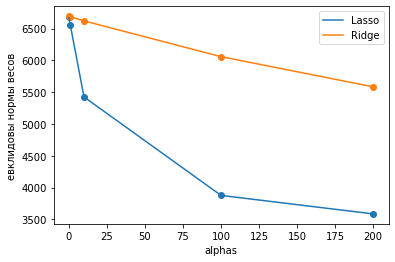

In [34]:
lambdas = [0.1, 1, 10, 100, 200]
norms1 = []
norms2 = []
for lambd in lambdas:
    reg = Lasso(alpha=lambd, max_iter=5000).fit(X_train, y_train)
    norms1.append(np.linalg.norm(reg.coef_))
    reg = Ridge(alpha=lambd).fit(X_train, y_train)
    norms2.append(np.linalg.norm(reg.coef_))
plt.scatter(lambdas, norms1)
plt.scatter(lambdas, norms2)
plt.xlabel('alphas')
plt.ylabel('евклидовы нормы весов')
plt.plot(lambdas, norms1)
plt.plot(lambdas, norms2)
plt.legend(('Lasso', 'Ridge'))

L1-регуляризация (Lasso) агрессивнее уменьшает веса. Её часто используют для отбора признаков, так как она обнуляет некоторые коэффициенты, а L2 пытается всё уменьшать равномерно.

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [35]:
from sklearn.linear_model import LassoCV
reg = LassoCV(cv=5, random_state=0, alphas=lambdas, max_iter=5000).fit(X, y)
print(*reg.alphas_)

200.0 100.0 10.0 1.0 0.1


In [36]:
reg.mse_path_

array([[ 1796211.82799708,  2334050.17328908, 17638073.94915106,
          212145.52718045,   758081.8273063 ],
       [ 1495282.90800399,  2135758.94325384, 13794582.59446713,
          254803.30263456,   659459.14566245],
       [ 1009769.42218079,  1681143.82501946,  8691434.32441942,
          613215.21952861,   593008.25232413],
       [  886439.42567065,  1503777.14513382,  7632477.68816507,
          749954.90816431,   623553.25779013],
       [  886284.10918055,  1490237.32700203,  7422903.25422976,
          767617.9585119 ,   633852.18839777]])

In [37]:
reg.mse_path_.mean(axis=1)

array([4547712.66098479, 3667977.37880439, 2517714.20869448,
       2279240.4849848 , 2240178.9674644 ])

Наилучшее качество даёт alpha=0.1.

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [38]:
from sklearn.linear_model import Lasso
reg = Lasso(alpha=0.1, max_iter=5000).fit(X_train, y_train)
print(mean_squared_error(y_pred_train, y_train))
print(mean_squared_error(y_pred_test, y_test))
for column, coef in zip(X.columns, reg.coef_):
    print("{: <14} {:8.2f}".format(column, coef))

1274045.0062812346
1283045.877103768
carat           5362.28
depth            -94.95
table            -62.03
x              -1143.02
y                 -1.69
z                -32.45
cut_Good         164.59
cut_Ideal        403.17
cut_Premium      326.21
cut_Very Good    302.46
color_E          -81.85
color_F         -106.43
color_G         -197.05
color_H         -357.03
color_I         -445.87
color_J         -525.29
clarity_IF       946.65
clarity_SI1     1538.93
clarity_SI2      983.72
clarity_VS1     1614.16
clarity_VS2     1758.15
clarity_VVS1    1241.05
clarity_VVS2    1425.42


Наиболее информативными признаками оказались carat и x, а также clarity (все, особенно clarity_SI1, clarity_VS1, clarity_VS2, clarity_VVS1, clarity_VVS2). Наименее информативными оказались y, z, table, color_E, depth.

Карат -- это мера веса драгоценных камней. Очевидно, что цена сильно зависит от веса. x -- длина в миллиметрах. Размер должен тоже влиять на стоимость, но у y и z коэффициенты почему-то сильно меньше. Корреляция цены и x больше, чем цены и y или z (видно из таблицы корреляций). То, что у clarity большие коэффициенты, не кажется странным. Видимо, прозрачность сильно влиет на цену. У table и depth коэффициенты маленькие, как и корреляция с ценой маленькая.

То, что у color_E коэффициент меньше (по модулю), чем у остальных цветов, понятно. diamond colour, from J (worst) to D (best). Это порядковый признак, а D удален, так что от E к J коэффициенты по модулю возрастают.

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [39]:
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)
print(mean_squared_error(y_pred_train, y_train))
print(mean_squared_error(y_pred_test, y_test))

1274051.1404124745
1283090.4411347879


In [40]:
print('Без регуляризации было:')
print('1274140.2656753361')
print('1283377.7107486718')

Без регуляризации было:
1274140.2656753361
1283377.7107486718


Модель с регуляризацией работает чуть-чуть лучше, но на самом деле примерно так же.

Возможное объяснение -- уменьшили переобучение, но регуляризация очень маленькая, изменение слабое.